In [92]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
def read_data():
    df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
    df2 = pd.read_csv("../tests/results/birdsounds_precision.csv", index_col=0)
    df3 = pd.read_csv("../tests/results/soundtracks_precision.csv", index_col=0)
    df4 = pd.read_csv("../tests/results/audio_precision.csv", index_col=0)
    df = pd.concat([df1, df2, df3, df4])
    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    return df

df = read_data()
df

,Dataset,Method,Precision,Recall
0,Boxing,LAMA,0.9000,0.9
2,Boxing,mSTAMP+MDL,1.0000,0.2
3,Boxing,mSTAMP,1.0000,0.2
4,Boxing,EMD*,0.8000,0.8
5,Boxing,K-Motifs (TOP-f),0.7000,0.7
...,...,...,...,...
105,Queen David Bowie - Under Pressure,K-Motifs (TOP-f),0.7500,1.0
106,Queen David Bowie - Under Pressure,K-Motifs (all),0.8125,1.0
107,Queen David Bowie - Under Pressure,LAMA (cid),0.1250,1.0
108,Queen David Bowie - Under Pressure,LAMA (ed),0.0625,1.0


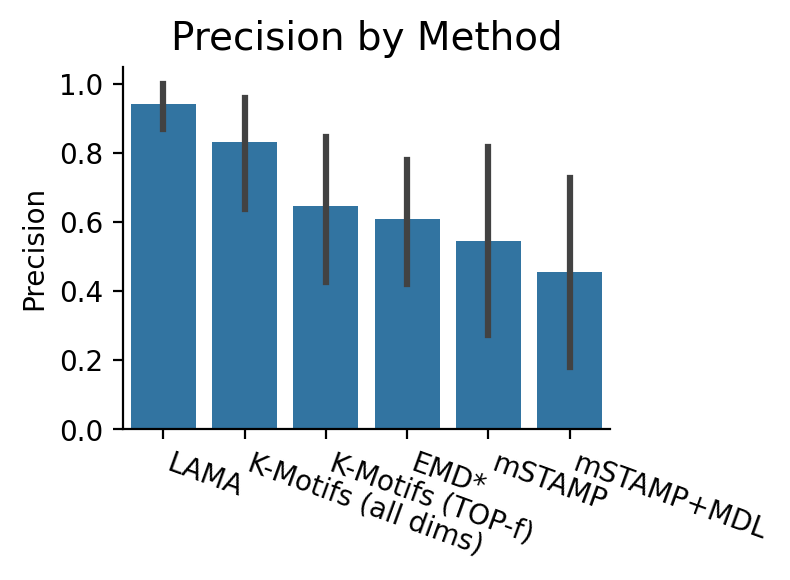

In [94]:
df = read_data()
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

# filter
with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[~df.Method.isin(with_distances)]

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision.pdf")

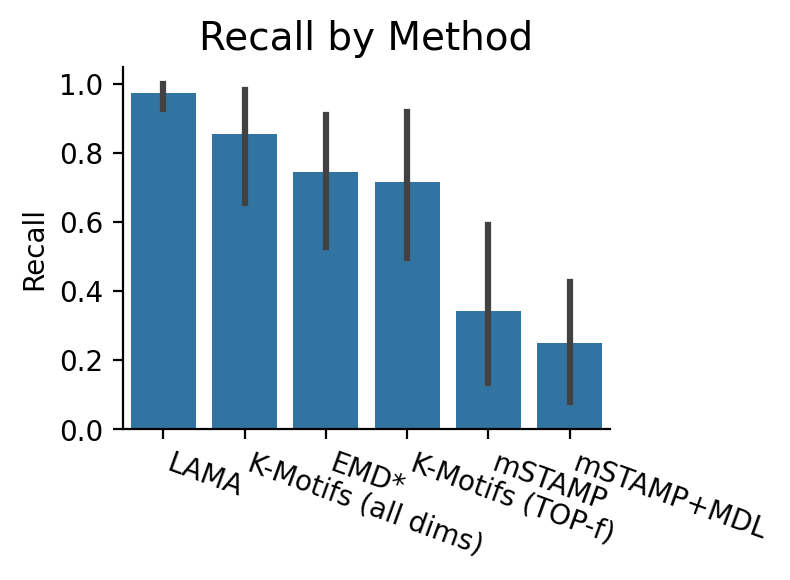

In [95]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall.pdf")

In [96]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]))

                    Precision           Recall       
                         mean median      mean median
Method                                               
EMD*                 0.608712   0.65  0.745455    0.8
K-Motifs (TOP-f)     0.646320   0.75  0.715152    1.0
K-Motifs (all dims)  0.831439   1.00  0.854545    1.0
LAMA                 0.942045   1.00  0.972727    1.0
mSTAMP               0.545455   1.00  0.342424    0.2
mSTAMP+MDL           0.454545   0.00  0.251515    0.0


In [97]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 0.608712 & 0.650000 & 0.745455 & 0.800000 \\
K-Motifs (TOP-f) & 0.646320 & 0.750000 & 0.715152 & 1.000000 \\
K-Motifs (all dims) & 0.831439 & 1.000000 & 0.854545 & 1.000000 \\
LAMA & 0.942045 & 1.000000 & 0.972727 & 1.000000 \\
mSTAMP & 0.545455 & 1.000000 & 0.342424 & 0.200000 \\
mSTAMP+MDL & 0.454545 & 0.000000 & 0.251515 & 0.000000 \\
\bottomrule
\end{tabular}



In [98]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

| Method              |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:--------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| EMD*                |                0.608712 |                      0.65 |             0.745455 |                    0.8 |
| K-Motifs (TOP-f)    |                0.64632  |                      0.75 |             0.715152 |                    1   |
| K-Motifs (all dims) |                0.831439 |                      1    |             0.854545 |                    1   |
| LAMA                |                0.942045 |                      1    |             0.972727 |                    1   |
| mSTAMP              |                0.545455 |                      1    |             0.342424 |                    0.2 |
| mSTAMP+MDL          |                0.454545 |                      0    |             0.251515 |                  

# Compare different Distance Measures

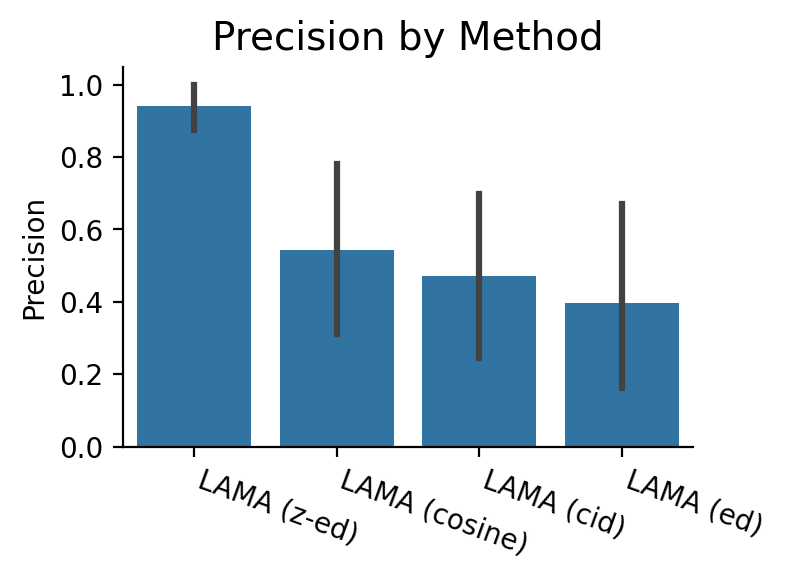

In [99]:
df = read_data()
df.Method[df.Method == "LAMA"] = "LAMA (z-ed)"

# filter
with_distances = ["LAMA (z-ed)", "LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[df.Method.isin(with_distances)]

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision_distances.pdf")

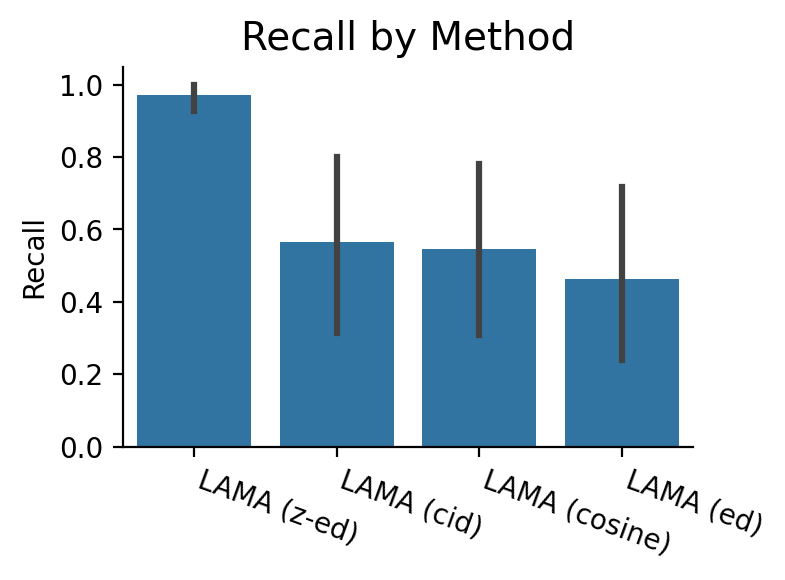

In [100]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall_distances.pdf")

In [101]:
#datasets = ["common-starling-sturnus-vulgaris.csv",
#"Lord-of-the-Rings-Symphony-The-Shire.csv",
#"Star_Wars_The_Imperial_March_Theme_Song.csv",
#"The-Rolling-Stones-Paint-It-Black.csv",
#"Numb-Linkin-Park.csv",
#"Queen-David-Bowie-Under-Pressure.csv",
#"Vanilla_Ice-Ice_Ice_Baby.csv",
#"What-I-ve-Done-Linkin-Park.csv"]

#for d in datasets:
#    df2 = pd.read_csv("../datasets/audio/"+d, index_col=0, compression='gzip')
#    print(d, df2.shape)

In [102]:
# df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]

In [103]:
# df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]